Mohammad Ayyaz Azeem 
CMS 32175

# Crime Analysis Through Machine Learning

In [1]:
# Import data manipulation packages
import pandas as pd
import numpy as np

# Import data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 12,8

#import gmplot
import numpy as np # linear algebra
#import pyproj as pp
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly as py
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
# Import CSV file as a pandas df (Data Frame)
dfcrime = pd.read_csv('C:\\Users\\irockONi7\\crime-in-vancouver/crime.csv')

In [3]:
dfcrime.head(5)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [4]:
dfcrime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530652 entries, 0 to 530651
Data columns (total 12 columns):
TYPE             530652 non-null object
YEAR             530652 non-null int64
MONTH            530652 non-null int64
DAY              530652 non-null int64
HOUR             476290 non-null float64
MINUTE           476290 non-null float64
HUNDRED_BLOCK    530639 non-null object
NEIGHBOURHOOD    474028 non-null object
X                530652 non-null float64
Y                530652 non-null float64
Latitude         530652 non-null float64
Longitude        530652 non-null float64
dtypes: float64(6), int64(3), object(3)
memory usage: 48.6+ MB


### Handling missing values

We can see that we have 530652 entries but some columns () have less, which means that there are missing values. Lets fill them.

In [5]:
# Cleaning & Transforming the data
dfcrime['HOUR'].fillna(99, inplace = True) # Defaulting records by filing the blank data for "HOUR" to "00" 
dfcrime['NEIGHBOURHOOD'].fillna('N/A', inplace = True) # Blank reords for "NEIGHBOURHOOD" set to "N/A"
dfcrime['HUNDRED_BLOCK'].fillna('N/A', inplace = True) # Blank reords for "HUNDRED_BLOCK" set to "N/A"
#Deleting "MINUTE" column as predicting information to the actual minute is not necessary here
dfcrime.drop(['MINUTE'],axis = 1,  inplace = True) #del dfcrime['MINUTE']

In [6]:
dfcrime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530652 entries, 0 to 530651
Data columns (total 11 columns):
TYPE             530652 non-null object
YEAR             530652 non-null int64
MONTH            530652 non-null int64
DAY              530652 non-null int64
HOUR             530652 non-null float64
HUNDRED_BLOCK    530652 non-null object
NEIGHBOURHOOD    530652 non-null object
X                530652 non-null float64
Y                530652 non-null float64
Latitude         530652 non-null float64
Longitude        530652 non-null float64
dtypes: float64(5), int64(3), object(3)
memory usage: 44.5+ MB


### Additional columns added

Adding "NeighbourhoodID", "CrimeTypeID", "Incident" colums 

In [7]:
# Adding "NeighbourhoodID" column as a category key ID for Neighbourhood
dfcrime['NeighbourhoodID'] = dfcrime.groupby('NEIGHBOURHOOD').ngroup().add(1)

In [8]:
# Adding "CrimeTypeID" column as a category key ID for "TYPE" as in type of crimes
dfcrime['CrimeTypeID'] = dfcrime.groupby('TYPE').ngroup().add(1)

In [9]:
# Adding "Incident" column as a row cound to keep track of incident totals per crime type, etc.
dfcrime['Incident'] = 1

In [10]:
dfcrime.head()

,TYPE,YEAR,MONTH,DAY,HOUR,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,NeighbourhoodID,CrimeTypeID,Incident
0,Other Theft,2003,5,12,16.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1
1,Other Theft,2003,5,7,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1
2,Other Theft,2003,4,23,16.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1
3,Other Theft,2003,4,20,11.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1
4,Other Theft,2003,4,12,17.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1


### Transforming the DATE column

The date is separated in different columns (YEAR, MONTH, DAY), let's combine them into a single column and add it as a new column called 'DATE'

In [11]:
# Combining date fields and adding a column "Date" format
dfcrime['Date'] = pd.to_datetime({'year':dfcrime['YEAR'], 'month':dfcrime['MONTH'], 'day':dfcrime['DAY']})

In [12]:
dfcrime.head()

,TYPE,YEAR,MONTH,DAY,HOUR,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,NeighbourhoodID,CrimeTypeID,Incident,Date
0,Other Theft,2003,5,12,16.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-05-12
1,Other Theft,2003,5,7,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-05-07
2,Other Theft,2003,4,23,16.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-04-23
3,Other Theft,2003,4,20,11.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-04-20
4,Other Theft,2003,4,12,17.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-04-12


In [13]:
# Using "DATE" to get weekday name's 
dfcrime['DayOfWeek'] = dfcrime['Date'].dt.weekday_name

In [14]:
dfcrime.head()

,TYPE,YEAR,MONTH,DAY,HOUR,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,NeighbourhoodID,CrimeTypeID,Incident,Date,DayOfWeek
0,Other Theft,2003,5,12,16.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-05-12,Monday
1,Other Theft,2003,5,7,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-05-07,Wednesday
2,Other Theft,2003,4,23,16.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-04-23,Wednesday
3,Other Theft,2003,4,20,11.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-04-20,Sunday
4,Other Theft,2003,4,12,17.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-04-12,Saturday


In [15]:
dfcrime['DayOfWeekID'] = dfcrime['Date'].dt.weekday

In [16]:
dfcrime.head()

,TYPE,YEAR,MONTH,DAY,HOUR,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,NeighbourhoodID,CrimeTypeID,Incident,Date,DayOfWeek,DayOfWeekID
0,Other Theft,2003,5,12,16.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-05-12,Monday,0
1,Other Theft,2003,5,7,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-05-07,Wednesday,2
2,Other Theft,2003,4,23,16.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-04-23,Wednesday,2
3,Other Theft,2003,4,20,11.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-04-20,Sunday,6
4,Other Theft,2003,4,12,17.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-04-12,Saturday,5


In [17]:
# Creating another dataframe to store data greater than 2017
dfpred = dfcrime[(dfcrime['YEAR'] >= 2017)]
# Creating another dataframe exclude the data greater than 2017
dfcrime = dfcrime[(dfcrime['YEAR'] < 2017)]

# Calling a dataframe results
dfcrime.head()

,TYPE,YEAR,MONTH,DAY,HOUR,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,NeighbourhoodID,CrimeTypeID,Incident,Date,DayOfWeek,DayOfWeekID
0,Other Theft,2003,5,12,16.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-05-12,Monday,0
1,Other Theft,2003,5,7,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-05-07,Wednesday,2
2,Other Theft,2003,4,23,16.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-04-23,Wednesday,2
3,Other Theft,2003,4,20,11.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-04-20,Sunday,6
4,Other Theft,2003,4,12,17.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-04-12,Saturday,5


In [18]:
dfcrime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512795 entries, 0 to 512794
Data columns (total 17 columns):
TYPE               512795 non-null object
YEAR               512795 non-null int64
MONTH              512795 non-null int64
DAY                512795 non-null int64
HOUR               512795 non-null float64
HUNDRED_BLOCK      512795 non-null object
NEIGHBOURHOOD      512795 non-null object
X                  512795 non-null float64
Y                  512795 non-null float64
Latitude           512795 non-null float64
Longitude          512795 non-null float64
NeighbourhoodID    512795 non-null int64
CrimeTypeID        512795 non-null int64
Incident           512795 non-null int64
Date               512795 non-null datetime64[ns]
DayOfWeek          512795 non-null object
DayOfWeekID        512795 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(7), object(4)
memory usage: 70.4+ MB


In [19]:
# Using pandas value_count function to aggregate types
dfcrime['TYPE'].value_counts().sort_index()

Break and Enter Commercial                                 32734
Break and Enter Residential/Other                          59558
Homicide                                                     209
Mischief                                                   67832
Offence Against a Person                                   52537
Other Theft                                                49301
Theft from Vehicle                                        166738
Theft of Bicycle                                           24744
Theft of Vehicle                                           37663
Vehicle Collision or Pedestrian Struck (with Fatality)       249
Vehicle Collision or Pedestrian Struck (with Injury)       21230
Name: TYPE, dtype: int64

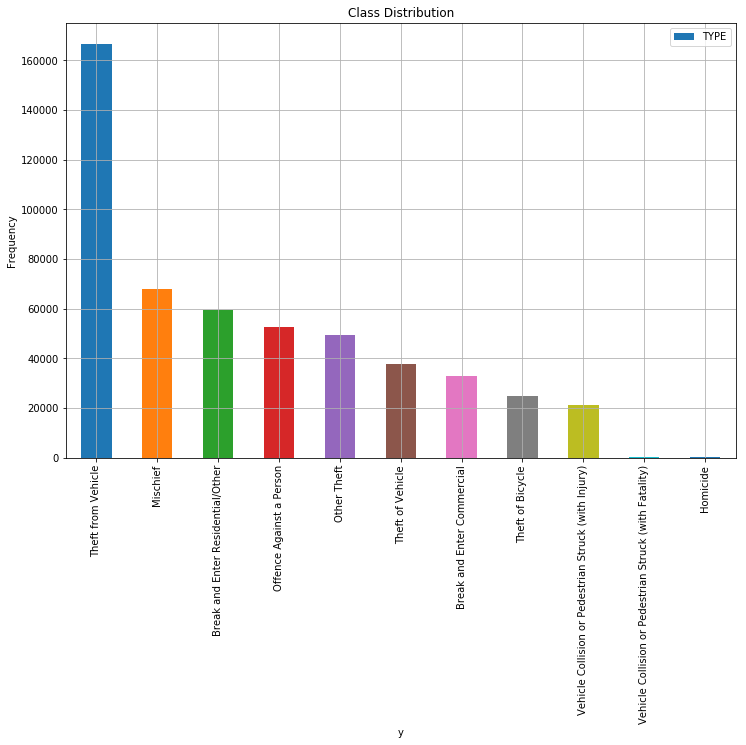

In [20]:
rcParams['figure.figsize'] = 12,8
count_classes = pd.value_counts(dfcrime['TYPE'],sort=True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Class Distribution")
plt.grid()
plt.xticks(rotation=90)
plt.xlabel('y')
plt.legend()
plt.ylabel('Frequency')
plt.savefig('C:\\Users\\irockONi7\\crime-in-vancouver/TypePerYear.jpg')

In [21]:
def category(crime_type):
    if 'Homicide' in crime_type:
        return 'Homicide'
    elif 'Theft' in crime_type:
        return 'Theft'
    elif 'Break' in crime_type:
        return 'Break and Enter'
    elif 'Collision' in crime_type:
        return 'Vehicle Collision'
    else:
        return 'Others'

In [22]:
dfcrime['CATEGORY']=dfcrime['TYPE'].apply(category)

In [23]:
dfcrime.head()

,TYPE,YEAR,MONTH,DAY,HOUR,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,NeighbourhoodID,CrimeTypeID,Incident,Date,DayOfWeek,DayOfWeekID,CATEGORY
0,Other Theft,2003,5,12,16.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-05-12,Monday,0,Theft
1,Other Theft,2003,5,7,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-05-07,Wednesday,2,Theft
2,Other Theft,2003,4,23,16.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-04-23,Wednesday,2,Theft
3,Other Theft,2003,4,20,11.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-04-20,Sunday,6,Theft
4,Other Theft,2003,4,12,17.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-04-12,Saturday,5,Theft


In [24]:
vehicle_collision = dfcrime[dfcrime['CATEGORY']=='Vehicle Collision']
crimes= dfcrime[dfcrime['CATEGORY']!='Vehicle Collision']
crimes1=crimes
crimes1.index = pd.DatetimeIndex(crimes1['Date'])

In [25]:
crimes1.shape

(491316, 18)

In [26]:
vehicle_collision.shape, crimes.shape

((21479, 18), (491316, 18))

In [27]:
# Using pandas value_count function to aggregate types
dfcrime['CATEGORY'].value_counts().sort_index()

Break and Enter       92292
Homicide                209
Others               120369
Theft                278446
Vehicle Collision     21479
Name: CATEGORY, dtype: int64

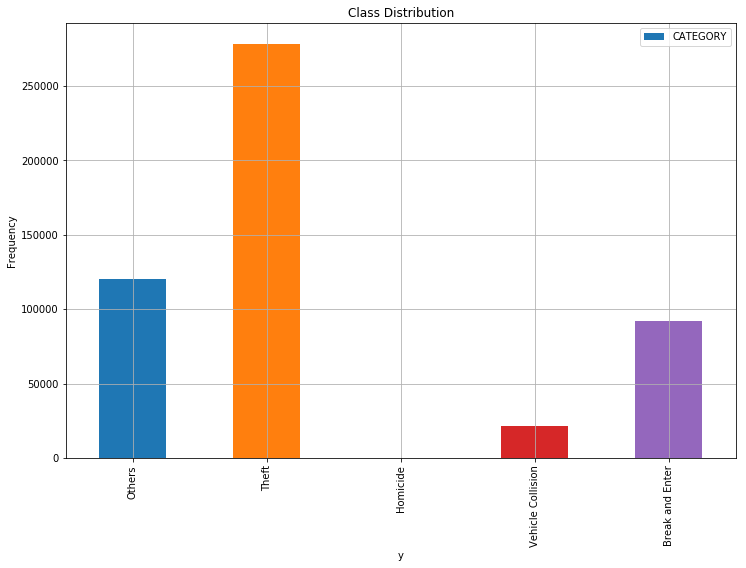

In [28]:
rcParams['figure.figsize'] = 12,8
count_classes = pd.value_counts(dfcrime['CATEGORY'],sort=False)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Class Distribution")
plt.grid()
plt.xticks(rotation=90)
plt.xlabel('y')
plt.legend()
plt.ylabel('Frequency')
plt.savefig('C:\\Users\\irockONi7\\crime-in-vancouver/CategoryPerYear.jpg')

## Exoloration and Visualization

By the graph below we can determine the general trend over the years. We can clearly see that starting from 2003, crime has decreased over the years with a slight uptake in 2016. Having it been an anomaly or an event that occured this spike in the data.

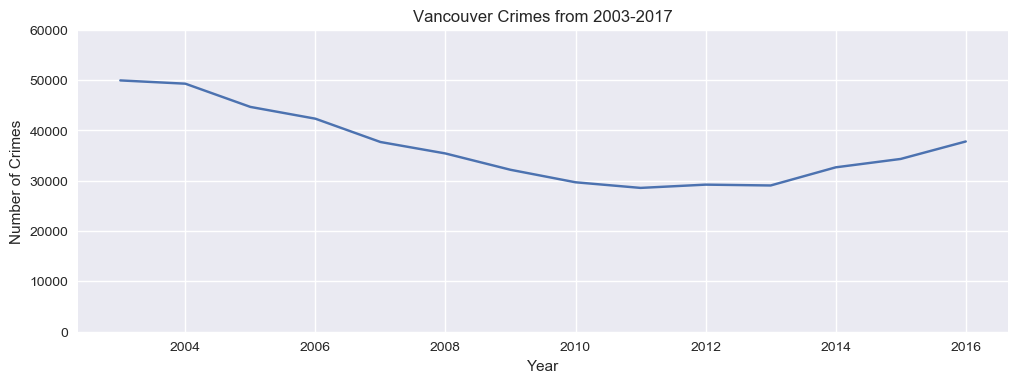

In [29]:
%matplotlib inline
# Setting plot style for all plots
plt.style.use('seaborn')

# Count all crimes and group by year
dfCrimeYear = pd.pivot_table(dfcrime, values=["Incident"],index = ["YEAR"], aggfunc='count')

# Graph results of Year by Crimes
f, ax = plt.subplots(1,1, figsize = (12, 4), dpi=100)
xdata = dfCrimeYear.index
ydata = dfCrimeYear
ax.plot(xdata, ydata)
ax.set_ylim(bottom=0, top=60000)
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Vancouver Crimes from 2003-2017')
plt.savefig('C:\\Users\\irockONi7\\crime-in-vancouver/Crimes15years.jpg')
plt.show()


In [30]:
crimes1

,TYPE,YEAR,MONTH,DAY,HOUR,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,NeighbourhoodID,CrimeTypeID,Incident,Date,DayOfWeek,DayOfWeekID,CATEGORY
Date,,,,,,,,,,,,,,,,,,
2003-05-12,Other Theft,2003,5,12,16.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,21,6,1,2003-05-12,Monday,0,Theft
2003-05-07,Other Theft,2003,5,7,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,21,6,1,2003-05-07,Wednesday,2,Theft
2003-04-23,Other Theft,2003,4,23,16.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,21,6,1,2003-04-23,Wednesday,2,Theft
2003-04-20,Other Theft,2003,4,20,11.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,21,6,1,2003-04-20,Sunday,6,Theft
2003-04-12,Other Theft,2003,4,12,17.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,21,6,1,2003-04-12,Saturday,5,Theft
2003-03-26,Other Theft,2003,3,26,20.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,21,6,1,2003-03-26,Wednesday,2,Theft
2003-03-10,Break and Enter Residential/Other,2003,3,10,12.0,63XX WILTSHIRE ST,Kerrisdale,489325.58,5452817.95,49.228051,-123.146610,8,2,1,2003-03-10,Monday,0,Break and Enter
2003-06-28,Mischief,2003,6,28,4.0,40XX W 19TH AVE,Dunbar-Southlands,485903.09,5455883.77,49.255559,-123.193725,3,4,1,2003-06-28,Saturday,5,Others
2003-02-16,Other Theft,2003,2,16,9.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,21,6,1,2003-02-16,Sunday,6,Theft


What's the distribution of crimes per day?
  
Lets start with a histogram of crimes per day

C:\Users\iRockONi7\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



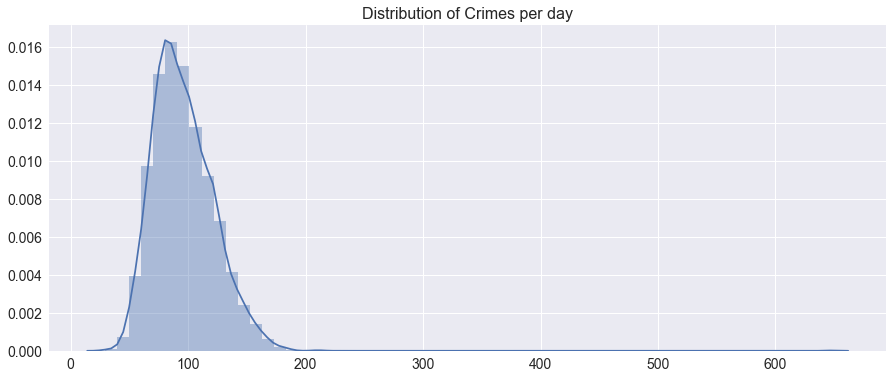

In [31]:
# using resample('D') to group it by day and size() to return the count
plt.figure(figsize=(15,6))
plt.title('Distribution of Crimes per day', fontsize = 16)
plt.tick_params(labelsize = 14)
sns.distplot(crimes1.resample('D').size(), bins = 60,hist=True,vertical=False)
plt.savefig('C:\\Users\\irockONi7\\crime-in-vancouver/CrimesDistutionPerDay.jpg')

we can see that the distribution looks like a normal distribution with a mean arround 95 crimes per day.  
There is one outlier over 600. Lets find out which day it is:

In [32]:
# Using idxmax() to find out the index of the max value
crimes1.resample('D').size().idxmax()

Timestamp('2011-06-15 00:00:00', freq='D')

So the day was 2011-06-15.  
Let's make a time series graph with crimes per day

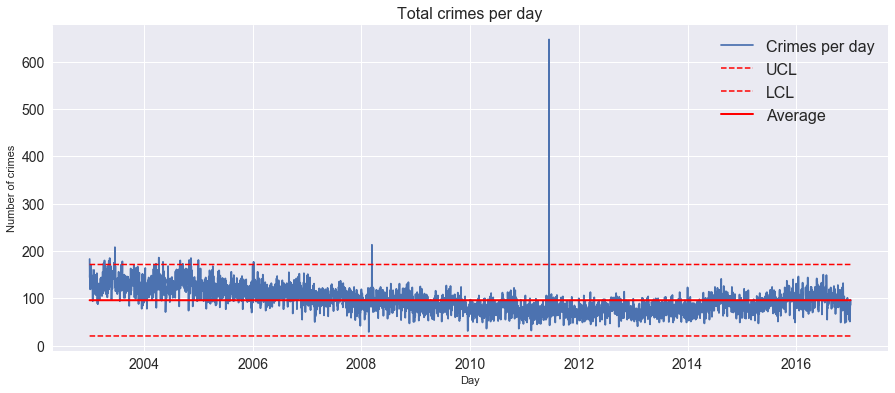

In [33]:
# time series graph with crimes per day 

#rcParams['figure.figsize'] = 12,8
# Create a Upper Control Limit (UCL) and a Lower Control Limit (LCL) without the outlier
crimes_daily = pd.DataFrame(crimes1[crimes1['Date'] != '2011-06-15'].resample('D').size())
crimes_daily['MEAN'] = crimes1[crimes1['Date'] != '2011-06-15'].resample('D').size().mean()
crimes_daily['STD'] = crimes1[crimes1['Date'] != '2011-06-15'].resample('D').size().std()
UCL = crimes_daily['MEAN'] + 3 * crimes_daily['STD']
LCL = crimes_daily['MEAN'] - 3 * crimes_daily['STD']

# Plot Total crimes per day, UCL, LCL, Moving-average
plt.figure(figsize=(15,6))
crimes1.resample('D').size().plot(label='Crimes per day')
UCL.plot(color='red', ls='--', linewidth=1.5, label='UCL')
LCL.plot(color='red', ls='--', linewidth=1.5, label='LCL')
crimes_daily['MEAN'].plot(color='red', linewidth=2, label='Average')
plt.title('Total crimes per day', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Number of crimes')
plt.tick_params(labelsize=14)
plt.legend(prop={'size':16})
plt.savefig('C:\\Users\\irockONi7\\crime-in-vancouver/TimeSeriesGraphPerDAY.jpg')

We can see some days over the Control Limits, indicating signals. Also, the period of 2003 to 2008 is above average. Maybe a different Control Limit could be done for that period, but that's ok for now.  
Lets focus on the day 2011-06-15 which is way above. Is that an error or the data?  
Lets drill down and find out

In [34]:
# Find out how many crimes by getting the length
len(crimes1['2011-06-15'])

647

In [35]:
# Check how many crimes per type
crimes1['2011-06-15']['CATEGORY'].value_counts().head()

Others             402
Break and Enter    184
Theft               61
Name: CATEGORY, dtype: int64

In [36]:
# Check how many crimes per type
crimes1['2011-06-15']['TYPE'].value_counts().head()

Mischief                      367
Break and Enter Commercial    174
Offence Against a Person       35
Theft from Vehicle             31
Theft of Bicycle               13
Name: TYPE, dtype: int64

In [37]:
# Check how many crimes per type
crimes1['2011-06-15']['NEIGHBOURHOOD'].value_counts().head()

Central Business District    534
N/A                           38
Mount Pleasant                13
West End                      13
Strathcona                     9
Name: NEIGHBOURHOOD, dtype: int64

In [38]:
# Check how many crimes per type
crimes1['2011-06-15']['HOUR'].value_counts().head()

20.0    159
21.0    132
22.0    108
19.0     48
99.0     35
Name: HOUR, dtype: int64

There are 647 occurrences, mostly mischief type, in Central Business District, around 20:00-22:00 but not exactly.  
The Stanley Cup Riot

## Types of crimes by year

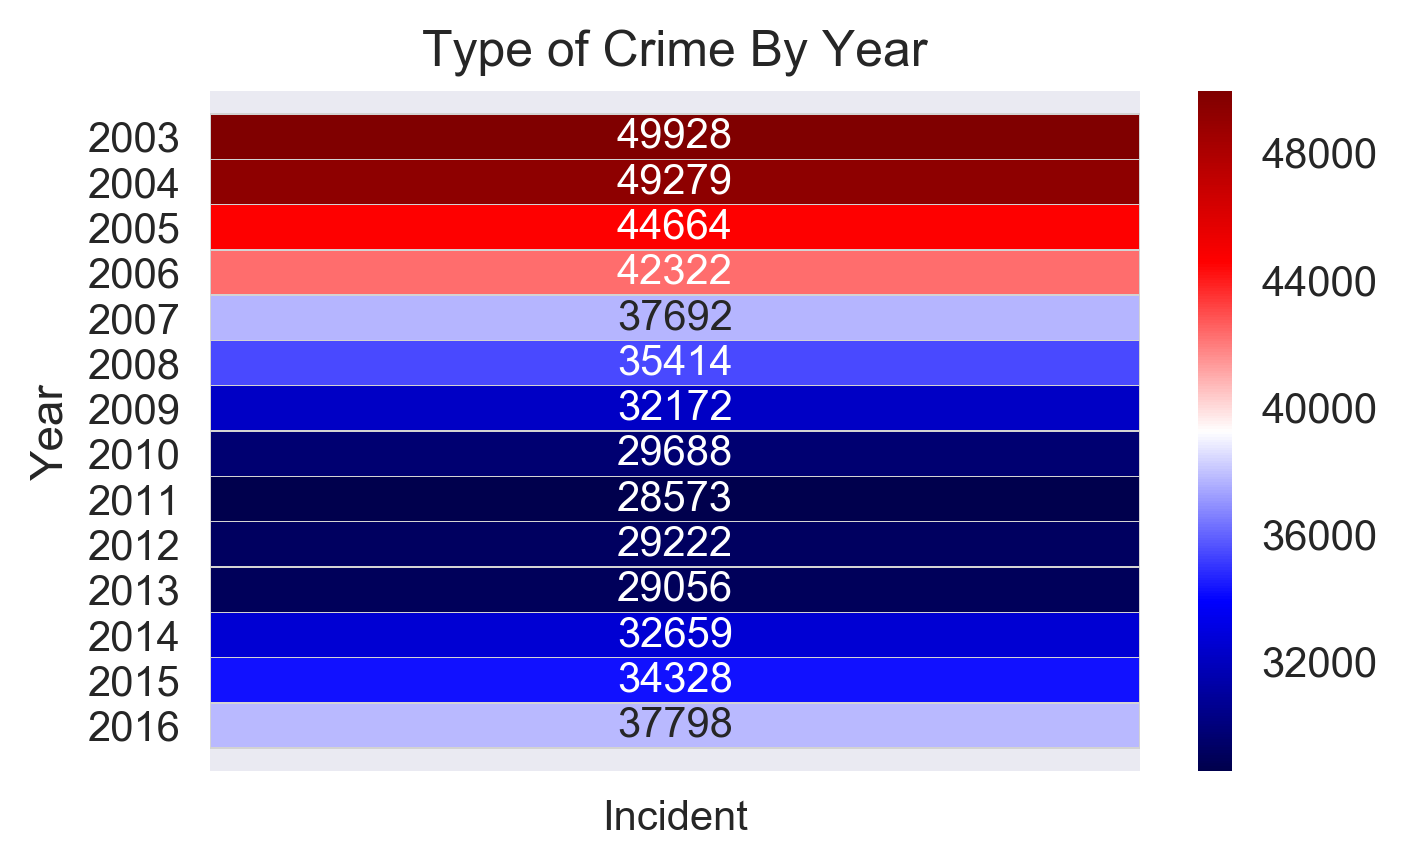

In [39]:
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize = (5, 3), dpi=300)
plt.title('Type of Crime By Year', fontsize=12)
plt.tick_params(labelsize=10)

sns.heatmap(
    dfCrimeYear, 
    linecolor='lightgrey',
    linewidths=0.1,
#    cmap='viridis', 
    cmap='seismic', 
    annot=True, 
    fmt=".0f"
);
# Remove labels
ax.set_ylabel('Year')    
#ax.set_xlabel('Year')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig('C:\\Users\\irockONi7\\crime-in-vancouver/12CrimesByYear.jpg')
plt.show()

Findings: Initial Year from 2003-2006 were the worst in case of crimes

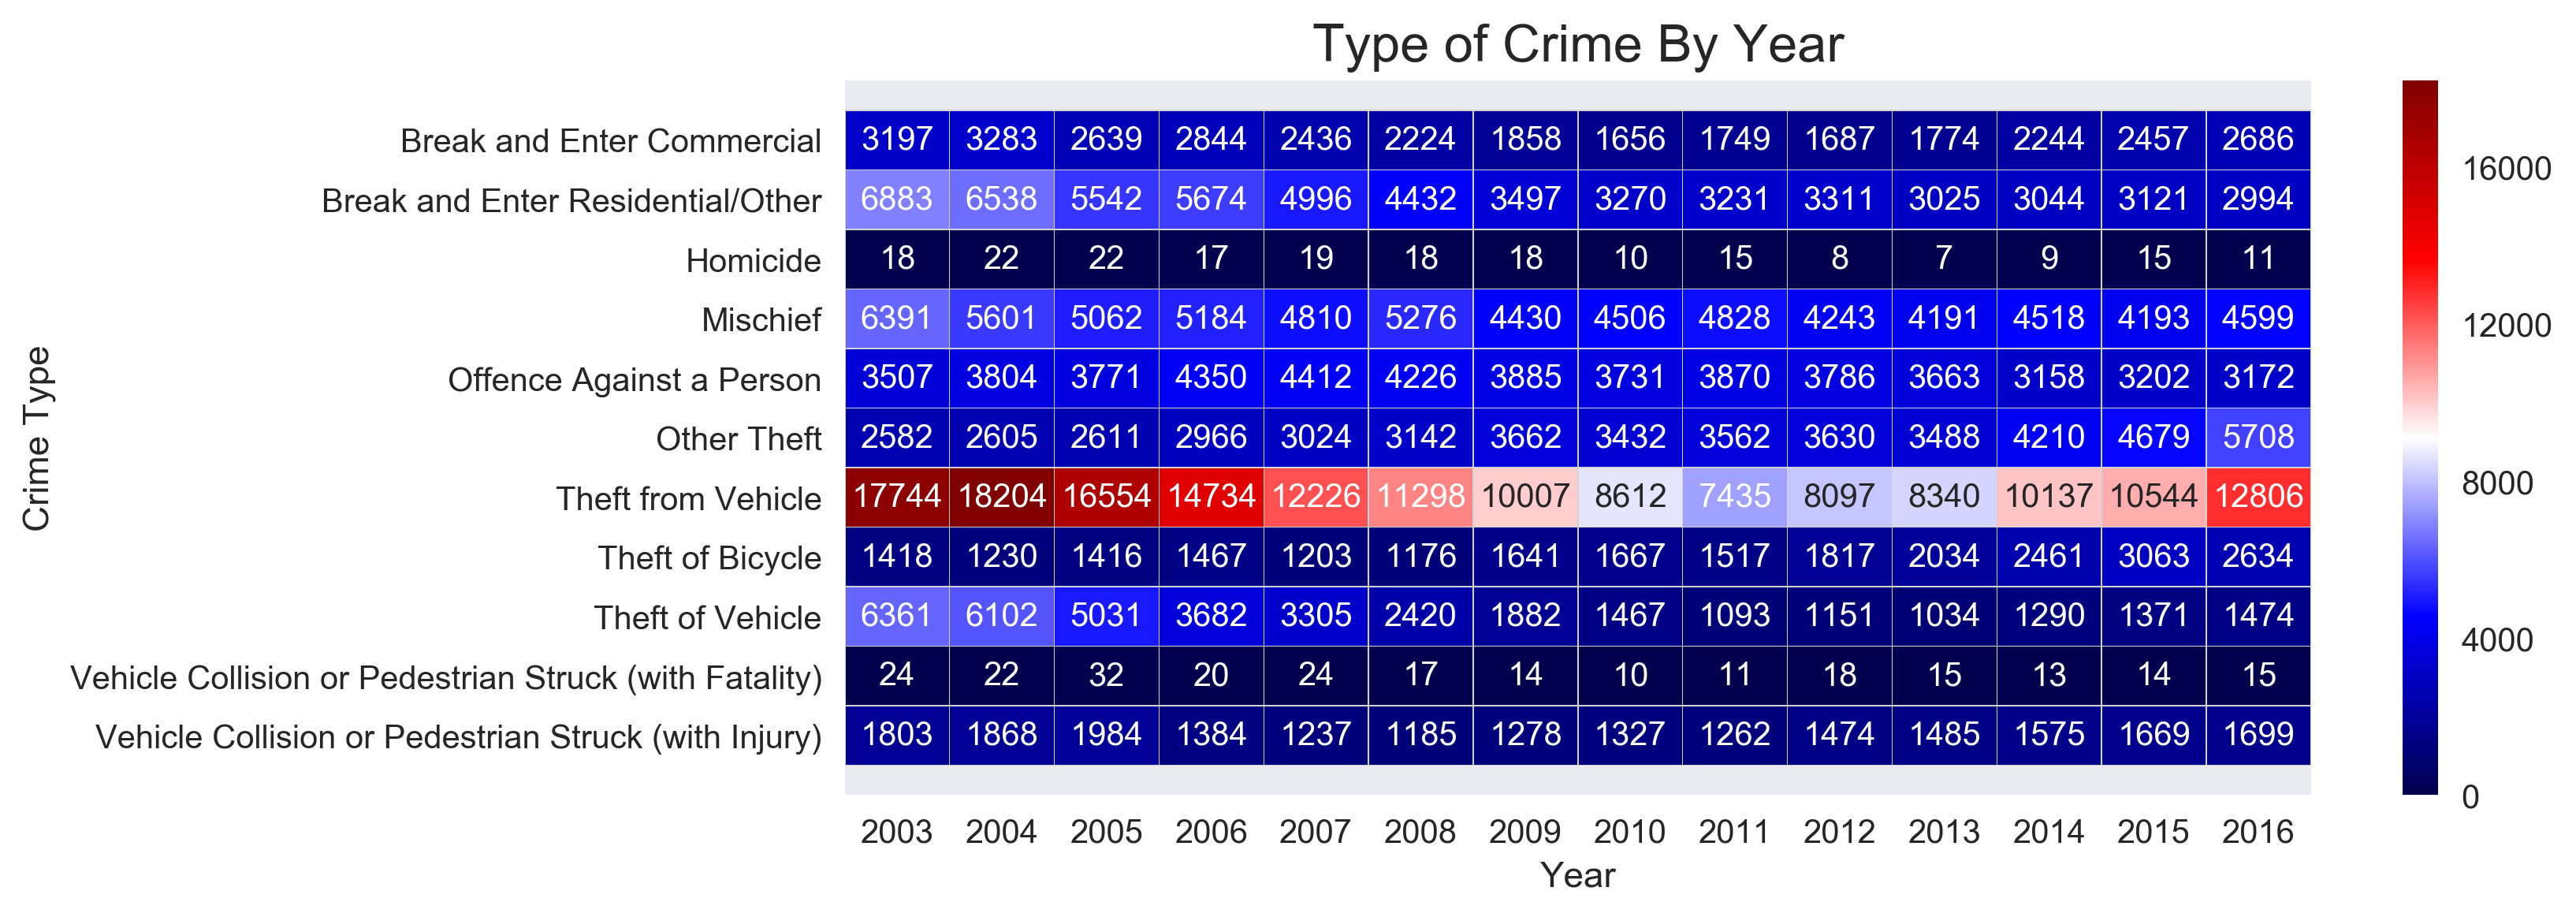

In [40]:
%matplotlib inline
# Create a pivot table with month and category. 
dfPivYear = dfcrime.pivot_table(values='Incident', index='TYPE', columns='YEAR', aggfunc=len)

#fig, ax = plt.subplots(1, 1, figsize = (12, 8), dpi=300)
fig, ax = plt.subplots(1, 1, figsize = (10, 4), dpi=300)
plt.title('Type of Crime By Year', fontsize=16)
plt.tick_params(labelsize=10)

sns.heatmap(
    dfPivYear.round(), 
    linecolor='lightgrey',
    linewidths=0.1,
    #cmap='viridis', 
    cmap='seismic',
    annot=True, 
    fmt=".0f"
)

# Remove labels
ax.set_ylabel('Crime Type')    
ax.set_xlabel('Year')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig('C:\\Users\\irockONi7\\crime-in-vancouver/13CrimesByYear.jpg')
plt.show()

Findings:
    1. Theft from Vehicle are the worst kind of crime.
    2. Least occuring crimes are 'Homicide' and 'Vehicle Collision(with Fatality)'

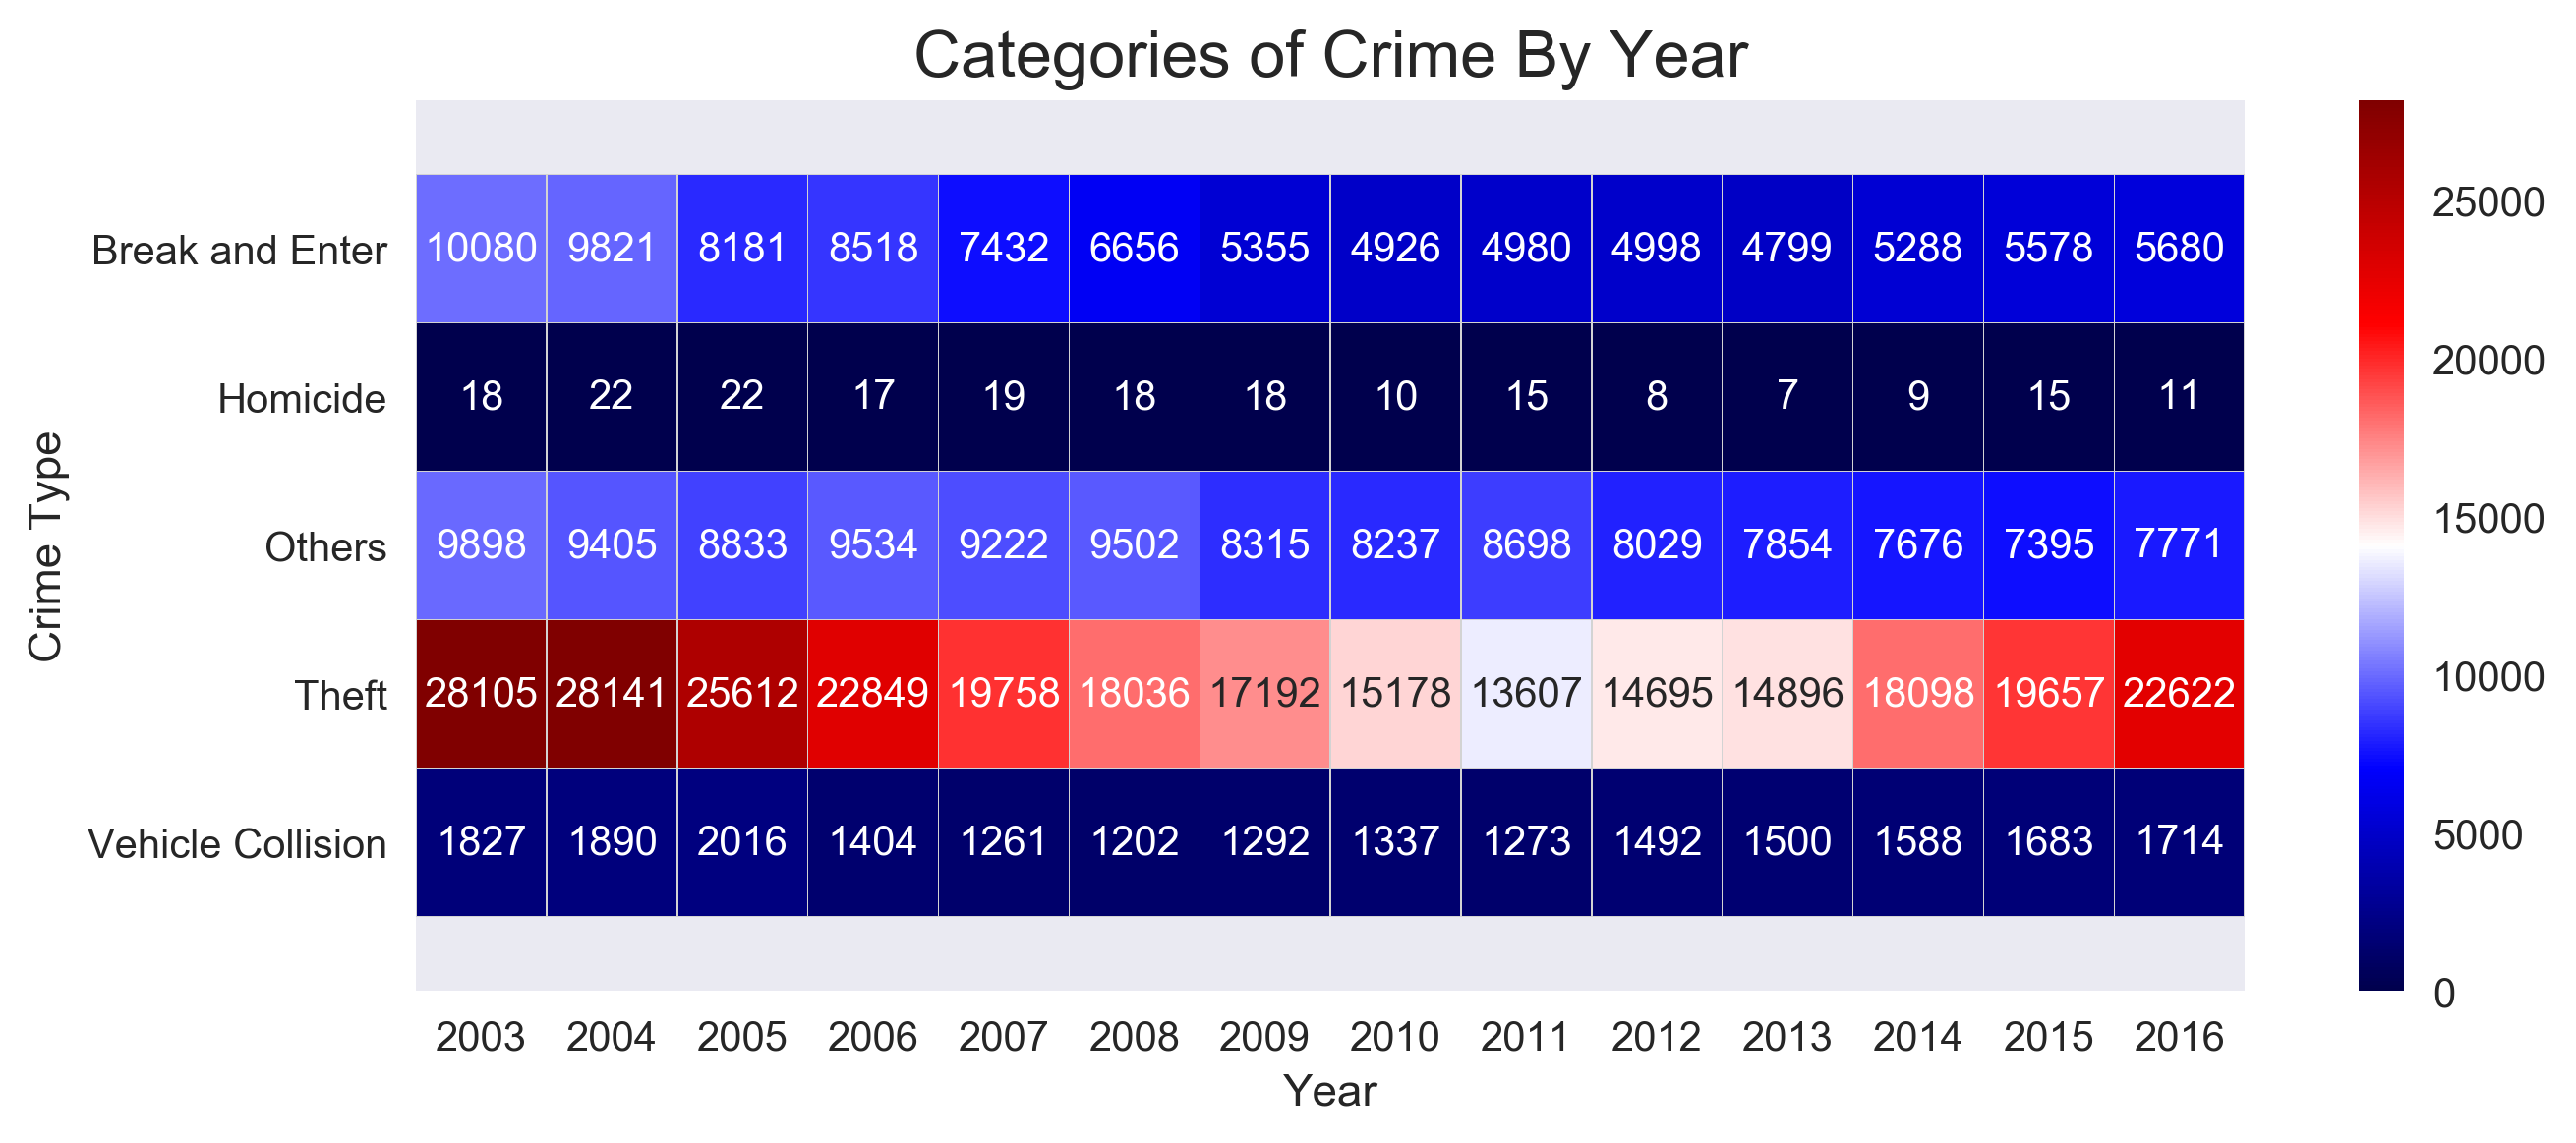

In [41]:
%matplotlib inline
# Create a pivot table with month and category. 
dfPivYear = dfcrime.pivot_table(values='Incident', index='CATEGORY', columns='YEAR', aggfunc=len)

#fig, ax = plt.subplots(1, 1, figsize = (12, 8), dpi=300)
fig, ax = plt.subplots(1, 1, figsize = (10, 4), dpi=300)
plt.title('Categories of Crime By Year', fontsize=16)
plt.tick_params(labelsize=10)

sns.heatmap(
    dfPivYear.round(), 
    linecolor='lightgrey',
    linewidths=0.1,
    #cmap='viridis', 
    cmap='seismic',
    annot=True, 
    fmt=".0f"
)

# Remove labels
ax.set_ylabel('Crime Type')    
ax.set_xlabel('Year')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig('C:\\Users\\irockONi7\\crime-in-vancouver/14CategoriesByYear.jpg')
plt.show()

Findings:
    1. Theft is the most occurring Crime
    2. Homicide is the least occurring Crime

In [42]:
dfCrimeYear.tail()

,Incident
YEAR,
2012,29222
2013,29056
2014,32659
2015,34328
2016,37798


Which are the highest and loswest crimes?

Noticing the bar graph below, it is evident that "Theft from the Vehicle" is the highest crime with "Homicide" being the lowest crime from 2003-2017

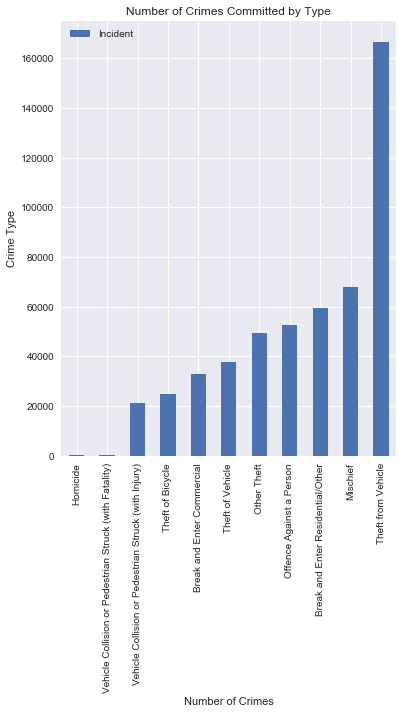

In [43]:
%matplotlib inline
# Pivoting dataframe by Crime Type to calculate Number of Crimes
dfCrimeType = pd.pivot_table(dfcrime, values=["Incident"],index = ["TYPE"], aggfunc='count')

dfCrimeType = dfCrimeType.sort_values(['Incident'], ascending=True)

# Create bar graph for number of crimes by Type of Crime
crimeplot = dfCrimeType.plot(kind='bar',
               figsize = (6,8),
               title='Number of Crimes Committed by Type'
             )

plt.rcParams["figure.dpi"] = 100
plt.legend(loc='best')
plt.ylabel('Crime Type')
plt.xlabel('Number of Crimes')
plt.show(crimeplot)

Over the years: Which are the highest and loswest crimes?

Over the years: Noticing the bar graph below, it is evident that "Theft from the Vehicle" is the highest crime with "Homicide" being the lowest crime from 2003-2017

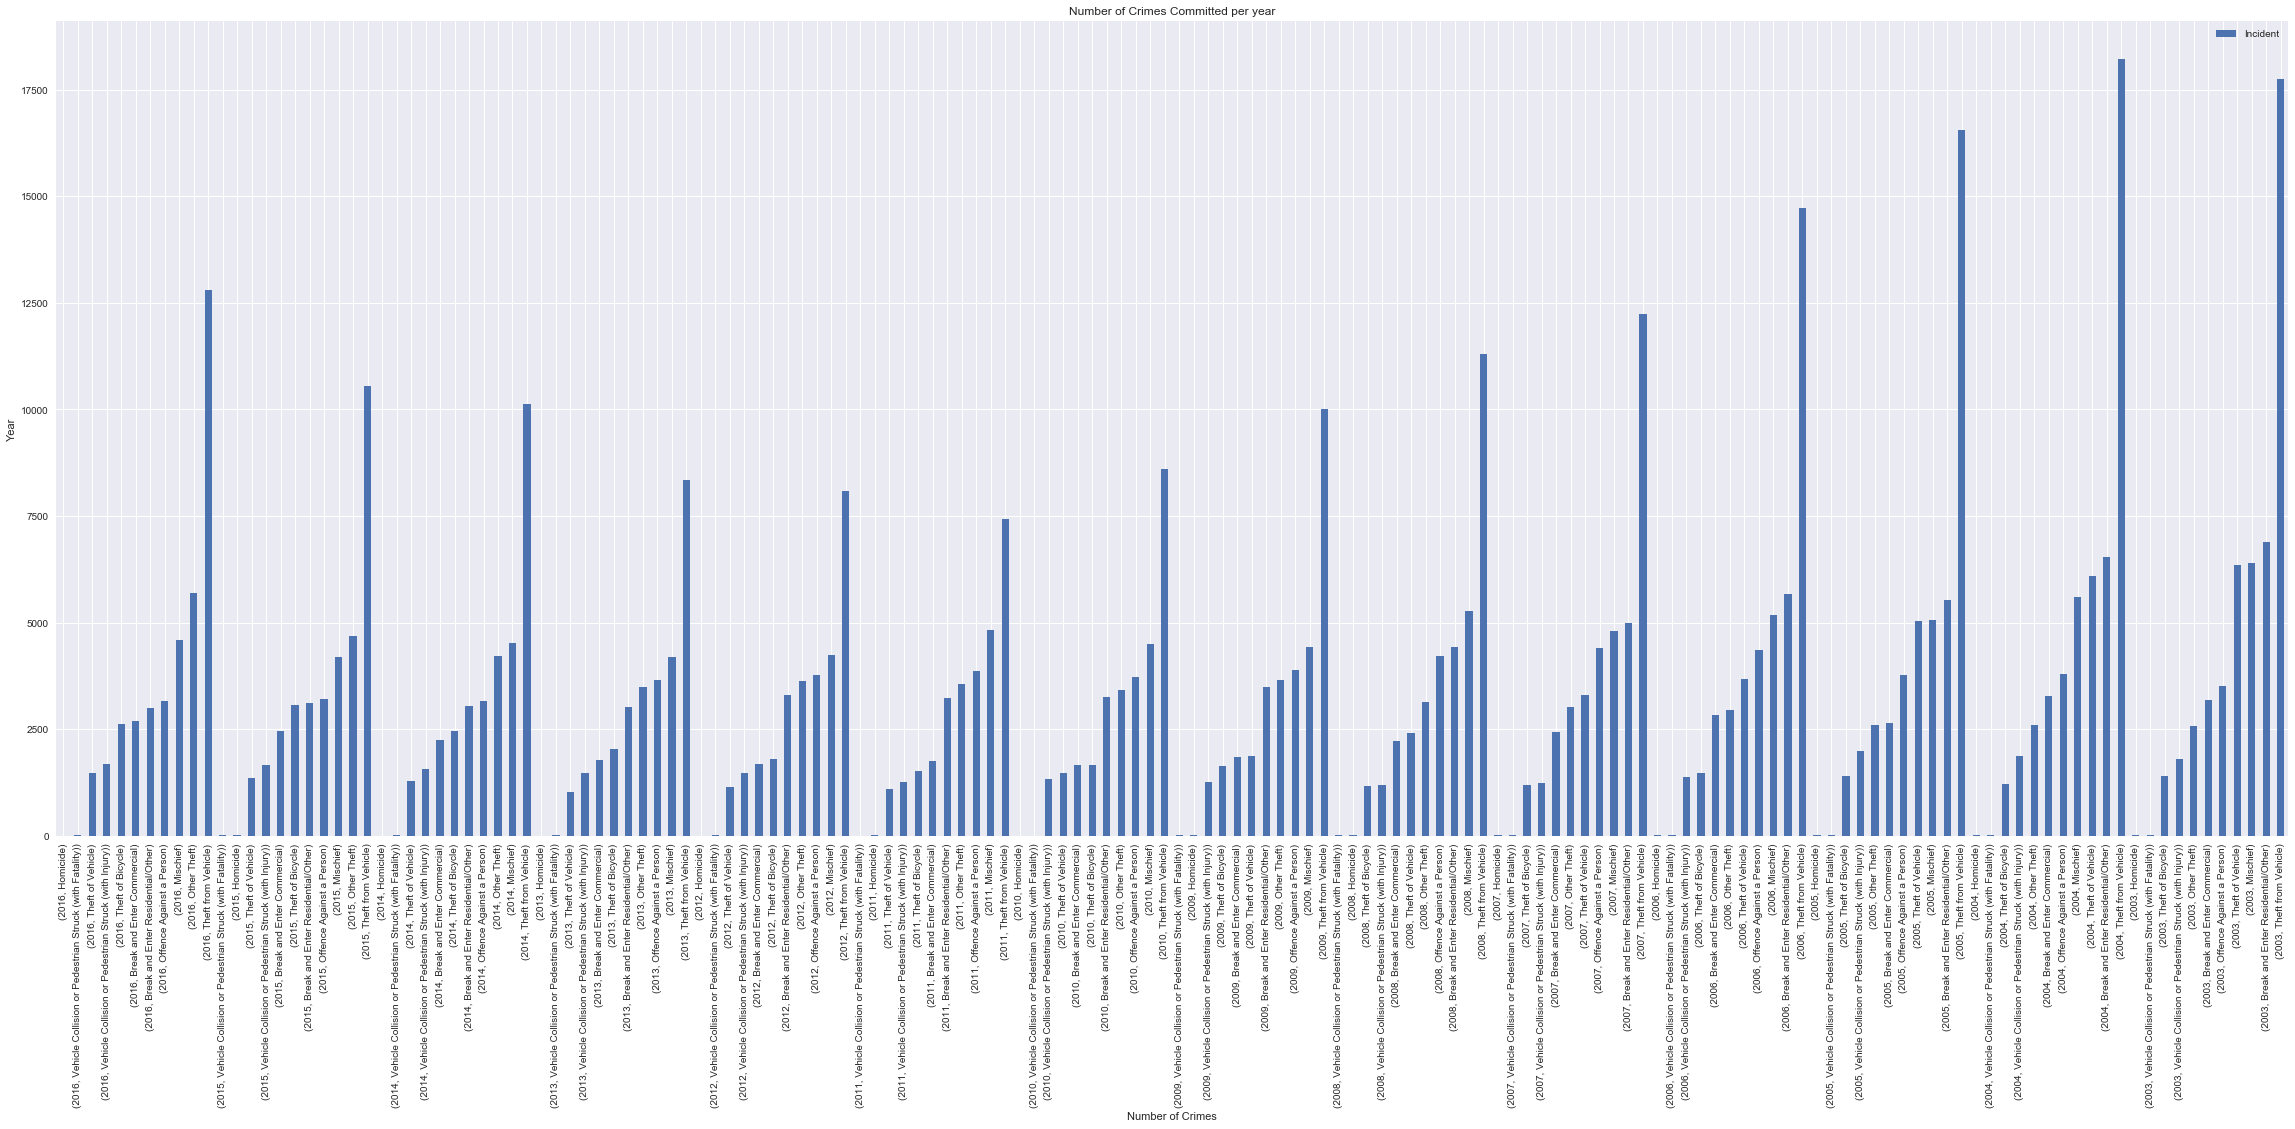

In [44]:
%matplotlib inline
# Count of Incidents per Year By Type
dfPivYearType = pd.pivot_table(dfcrime, values=["Incident"],index = ["YEAR", "TYPE"], aggfunc='count')

dfCrimeByYear = dfPivYearType.reset_index().sort_values(['YEAR','Incident'], ascending=[0,1]).set_index(["YEAR", "TYPE"])

# Create bar graph for number of crimes by Type of Crime Committed per year
crimeplot = dfCrimeByYear.plot(kind='bar',
               figsize = (40,15),
               title='Number of Crimes Committed per year'
             )

#plt.rcParams["figure.dpi"] = 100
plt.legend(loc='best')
plt.ylabel('Year')
plt.xlabel('Number of Crimes')
plt.show(crimeplot)


In [45]:
#dfCrimeByYear.iat[5,0]

In [46]:
#dfCrimeByYear['Incident'].mean()

In [47]:
#dfCrimeByYear[140:154]

In [48]:
dfCrimeByYear["Incident"].mean()

3329.8376623376626

In [49]:
dfCrimeByYear["Incident"].sum()/len(dfCrimeByYear["Incident"])

3329.8376623376626

In [50]:
dfCrimeByYear["Incident"].median()

2662.5

In [51]:
#dfCrimeByYear["Incident"].index

In [52]:
#dfCrimeByYear.describe()

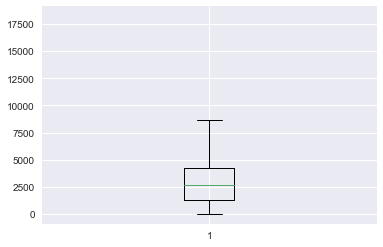

In [53]:
%matplotlib inline
# Count of Incidents per Year By Type
#dfPivYearType = pd.pivot_table(dfcrime, values=["Incident"],index = ["YEAR", "TYPE"], aggfunc='count')
#dfCrimeByYear = dfPivYearType.reset_index().sort_values(['YEAR','Incident'], ascending=[1,0]).set_index(["YEAR", "TYPE"])

# Plot data on box whiskers plot
NoOfCrimes = dfCrimeByYear["Incident"]
plt.boxplot(NoOfCrimes)
plt.show()

Is there a particular day/days of the week where crimes occur more?  
  
Weekends do look more prone to crimes in comparison with weekdays.

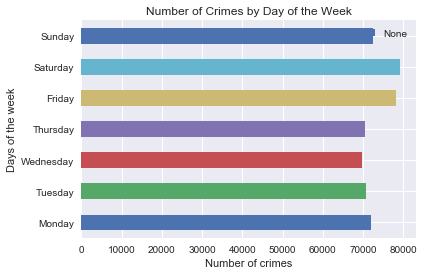

In [54]:
%matplotlib inline
# Adding Days Lookup
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']

# Grouping dataframe by Day of Week ID and plotting
dfcrime.groupby(dfcrime["DayOfWeekID"]).size().plot(kind='barh')

# Customizing Plot 
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.legend(loc='best')
plt.xlabel('Number of crimes')
plt.title('Number of Crimes by Day of the Week')
plt.savefig('C:\\Users\\irockONi7\\crime-in-vancouver/16CrimesPerWeek.jpg')
plt.show()

Findings: Weekend +Friday are most prone to Crimes

is there a trend of crimes per year on all crime?

At first glance, you can see that crime is ncreasing as the heattmap get darker moving to 2016.  
Homicide, Mischef, Vehicle collisions (All collisions) crimes look constant on the heatmap of the years.  
Studying the heatmap, 2010-2013 seems to display the lowest crime years. 

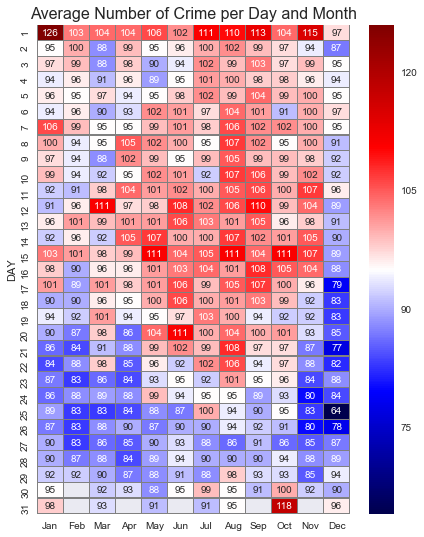

In [55]:
#rcParams['figure.figsize'] = 15,8
# Create a pivot table with day and month; another that counts the number of years that each day had; and the average. 

# Day vs Month graph for all years
crimes_pivot_table = crimes1[(crimes1['Date'] != '2011-06-15')].pivot_table(values='YEAR', index='DAY', columns='MONTH', aggfunc=len)
crimes_pivot_table_year_count = crimes1[(crimes1['Date'] != '2011-06-15')].pivot_table(values='YEAR', index='DAY', columns='MONTH', aggfunc=lambda x: len(x.unique()))
crimes_average = crimes_pivot_table/crimes_pivot_table_year_count
crimes_average.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# Using seaborn heatmap
plt.figure(figsize=(7,9))
plt.title('Average Number of Crime per Day and Month', fontsize=16)
sns.heatmap(crimes_average.round(), cmap='seismic', linecolor='grey',linewidths=0.1, cbar=True, annot=True, fmt=".0f");
plt.savefig('C:\\Users\\irockONi7\\crime-in-vancouver/15AverageCrimesperDayandMonth.jpg')

Findings:
Blue means good days. Red means bad days. White average days.  
  
1. The Calmest day of crime is Christmas Day. December 25(30% below average).  
2. The worst day is New Year's Day, January 1 and October 30-November 1 (Halloween).  
3. The first day of the month is a busy day for all month.  


## Is crime descreasing or increasing?  
  
Now let's plot the number of crimes per month and a moving average: 

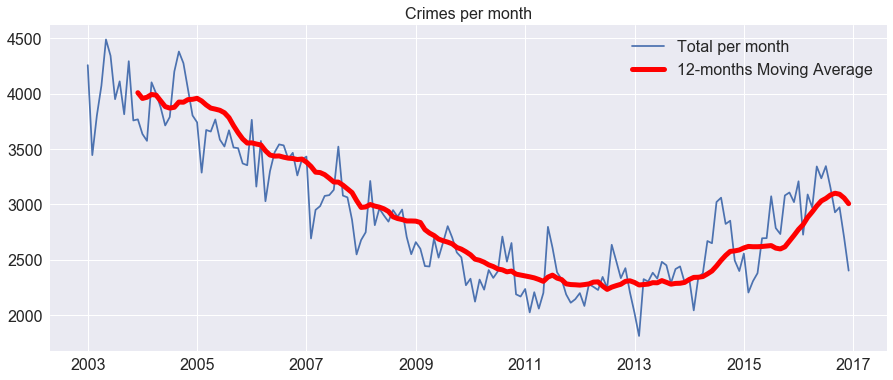

In [56]:
#rcParams['figure.figsize'] = 12,8
# Using resample 'M' and rolling window 12

plt.figure(figsize=(15,6))
crimes1.resample('M').size().plot(label='Total per month')
crimes1.resample('M').size().rolling(window=12).mean().plot(color='red', linewidth=5, label='12-months Moving Average')

plt.title('Crimes per month', fontsize=16)
plt.xlabel('')
#plt.grid()
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16);
plt.savefig('C:\\Users\\irockONi7\\crime-in-vancouver/11MovingAverageCrimesPerMonth.jpg')

From 2003 to 2011 the average number of crimes per month decreased from 4000 crimes per month to arround 2400.  
From 2011 to 2014, the moving average was around the same.  
From 2014 to 2015 the average has increased.   
From 2016 reached similar levels of 2008  

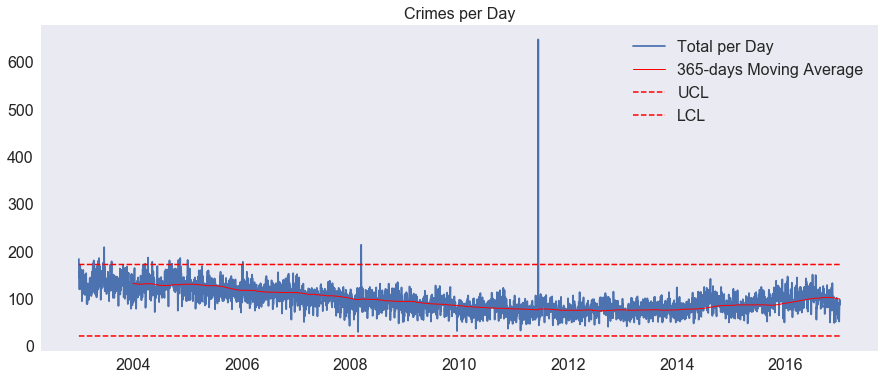

In [57]:
#rcParams['figure.figsize'] = 12,8
# Using resample 'D' and rolling window 365

plt.figure(figsize=(15,6))
crimes1.resample('D').size().plot(label='Total per Day')
crimes1.resample('D').size().rolling(window=365).mean().plot(color='red', linewidth=1, label='365-days Moving Average')

UCL.plot(color='red', ls='--', linewidth=1.5, label='UCL')
LCL.plot(color='red', ls='--', linewidth=1.5, label='LCL')
plt.title('Crimes per Day', fontsize=16)
plt.xlabel('')
plt.grid()
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16);

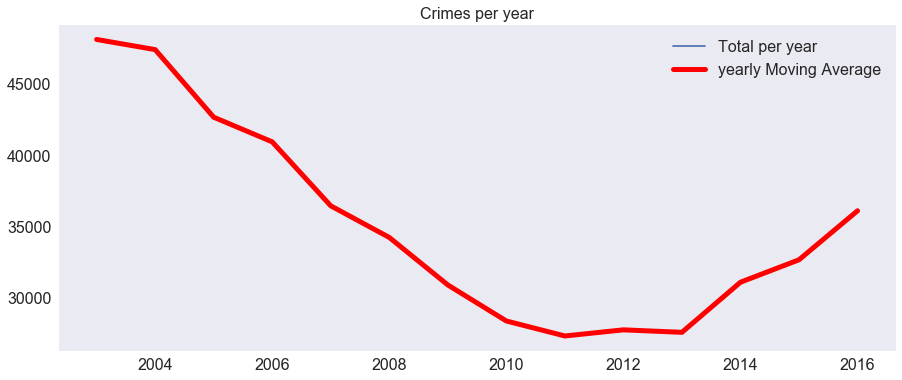

In [58]:
#rcParams['figure.figsize'] = 12,8
# Using resample 'Y' and rolling window 1

plt.figure(figsize=(15,6))
crimes1.resample('Y').size().plot(label='Total per year')
crimes1.resample('Y').size().rolling(window=1).mean().plot(color='red', linewidth=5, label='yearly Moving Average')

plt.title('Crimes per year', fontsize=16)
plt.xlabel('')
plt.grid()
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16);

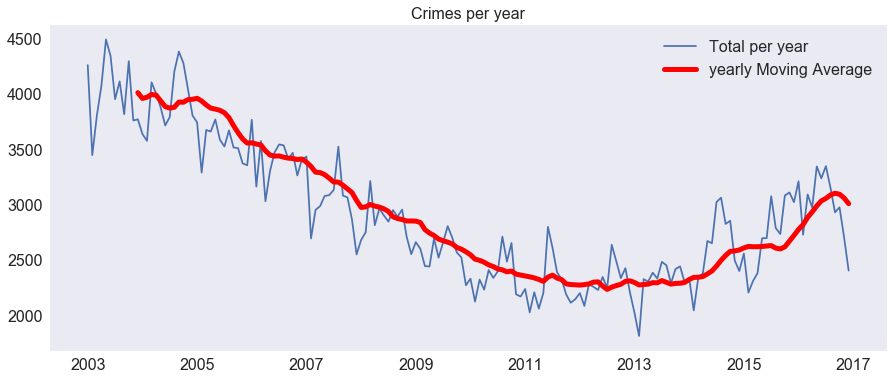

In [59]:
#rcParams['figure.figsize'] = 12,8
# Using resample 'Y' and rolling window 1

plt.figure(figsize=(15,6))
crimes1.resample('M').size().plot(label='Total per year')
crimes1.resample('M').size().rolling(window=12).mean().plot(color='red', linewidth=5, label='yearly Moving Average')

plt.title('Crimes per year', fontsize=16)
plt.xlabel('')
plt.grid()
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16);

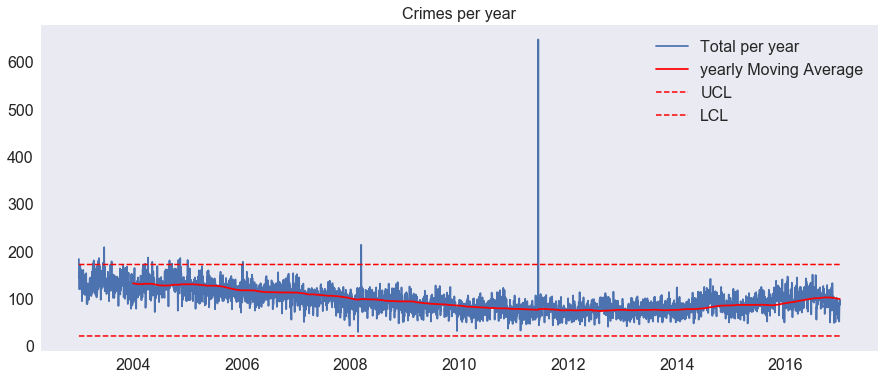

In [60]:
#rcParams['figure.figsize'] = 12,8
# Using resample 'Y' and rolling window 1

plt.figure(figsize=(15,6))
crimes1.resample('D').size().plot(label='Total per year')
crimes1.resample('D').size().rolling(window=365).mean().plot(color='red', label='yearly Moving Average')

UCL.plot(color='red', ls='--', linewidth=1.5, label='UCL')
LCL.plot(color='red', ls='--', linewidth=1.5, label='LCL')
plt.title('Crimes per year', fontsize=16)
plt.xlabel('')
plt.grid()
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16);

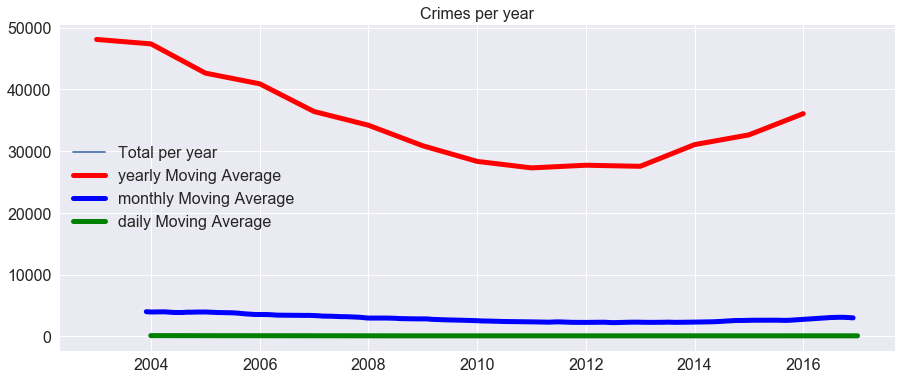

In [61]:
#rcParams['figure.figsize'] = 12,8
# Using resample 'Y' and rolling window 1

plt.figure(figsize=(15,6))
crimes1.resample('Y').size().plot(label='Total per year')
crimes1.resample('Y').size().rolling(window=1).mean().plot(color='red', linewidth=5, label='yearly Moving Average')
crimes1.resample('M').size().rolling(window=12).mean().plot(color='blue', linewidth=5, label='monthly Moving Average')
crimes1.resample('D').size().rolling(window=365).mean().plot(color='green', linewidth=5, label='daily Moving Average')

plt.title('Crimes per year', fontsize=16)
plt.xlabel('')
#plt.grid()
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16);
plt.savefig('C:\\Users\\irockONi7\\crime-in-vancouver/17PerYearPerMonthPerDayAverage.jpg')

## Is the trend the same for all categories? 

C:\Users\iRockONi7\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:86: FutureWarning:

'Date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version



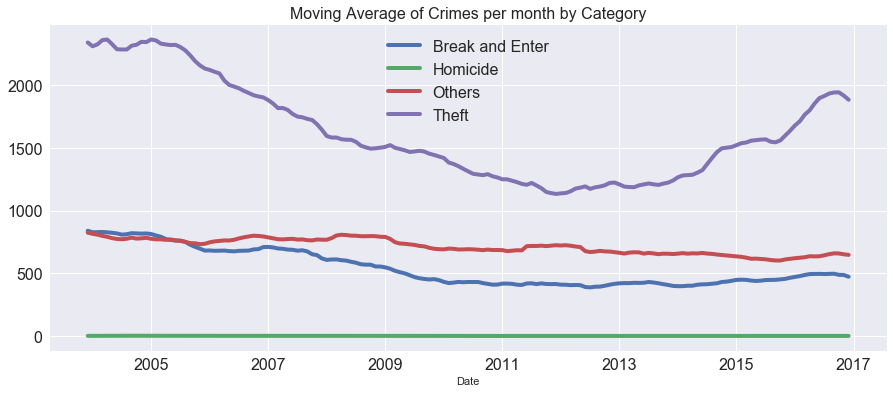

In [62]:
# Using pivot_table to groub by date and category, resample 'M' and rolling window 12
crimes1.pivot_table(values='TYPE', index='Date', columns='CATEGORY', aggfunc=len).resample('M').sum().rolling(window=12).mean().plot(figsize=(15,6), linewidth=4)
plt.title('Moving Average of Crimes per month by Category', fontsize=16)
#plt.xlabel('')
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16);
plt.savefig('C:\\Users\\irockONi7\\crime-in-vancouver/18PerMonthByCategory.jpg')

Findings: Theft is the major category.   The descrease and increase that we saw in the average number of crimes per month was mainly because of the variations in this category.

## is there any trend within the year?

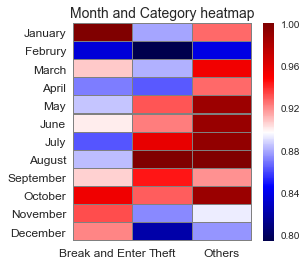

In [63]:
# Create a pivot table with month and category. 
crimes_pivot_table = crimes1.pivot_table(values='TYPE', index='CATEGORY', columns='MONTH', aggfunc=len)

# To compare categories, I'm scaling each category by diving by the max value of each one
crimes_scaled = pd.DataFrame(crimes_pivot_table.iloc[0] / crimes_pivot_table.iloc[0].max())

# Using a for loop to scale others
for i in [3,2]:
    crimes_scaled[crimes_pivot_table.index[i]] =  pd.DataFrame(crimes_pivot_table.iloc[i] / crimes_pivot_table.iloc[i].max())

crimes_scaled.index = ['January','Februry','March','April','May','June','July','August','September','October','November','December']    
# Using seaborn heatmap
plt.figure(figsize=(4,4))
plt.title('Month and Category heatmap', fontsize=14)
plt.tick_params(labelsize=12)
sns.heatmap(crimes_scaled, cmap='seismic', linecolor='grey',linewidths=0.1, cbar=True)
plt.savefig('C:\\Users\\irockONi7\\crime-in-vancouver/19MonthANDcategory.jpg')

Findings:
Break and Enter has most incidents in January  
Theft has most incidents in July-August  
Others crimes has most incidents from May to October  

## What about Day of the Week?

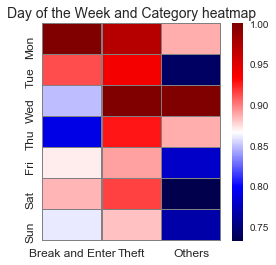

In [64]:
# Create a pivot table with day of the week and category. 
crimes_pivot_table = crimes1.pivot_table(values='TYPE', index='CATEGORY', columns='DayOfWeek', aggfunc=len)

# To compare categories, I'm scaling each category by diving by the max value of each one
crimes_scaled = pd.DataFrame(crimes_pivot_table.iloc[0] / crimes_pivot_table.iloc[0].max())

# Using a for loop to scale row
for i in [3,2]:
    crimes_scaled[crimes_pivot_table.index[i]] = crimes_pivot_table.iloc[i] / crimes_pivot_table.iloc[i].max()
                    
crimes_scaled.index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

# Using seaborn heatmap
plt.figure(figsize=(4,4))
plt.title('Day of the Week and Category heatmap', fontsize=14)
plt.tick_params(labelsize=12)
sns.heatmap(crimes_scaled, cmap='seismic', linecolor='grey',linewidths=0.1, cbar=True)
plt.savefig('C:\\Users\\irockONi7\\crime-in-vancouver/20DayOfTheWeek.jpg')

Findings:  
1. Break and Enter is more frequeent of Weekdays.  
2. Theft and Others on weekends.  

## What hours do crime happen?

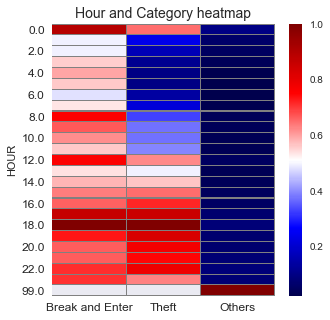

In [65]:
# Create a pivot table with hour and category. 
crimes_pivot_table = crimes1.pivot_table(values='TYPE', index='CATEGORY', columns='HOUR', aggfunc=len)

# To compare categories, I'm scaling each category by diving by the max value of each one
crimes_scaled = pd.DataFrame(crimes_pivot_table.iloc[0] / crimes_pivot_table.iloc[0].max())

# Using a for loop to scale row
for i in [3,2]:
    crimes_scaled[crimes_pivot_table.index[i]] =  pd.DataFrame(crimes_pivot_table.iloc[i] / crimes_pivot_table.iloc[i].max())
                    
# Using seaborn heatmap
plt.figure(figsize=(5,5))
plt.title('Hour and Category heatmap', fontsize=14)
plt.tick_params(labelsize=12)
sns.heatmap(crimes_scaled, cmap='seismic', linecolor='grey',linewidths=0.1, cbar=True);
plt.savefig('C:\\Users\\irockONi7\\crime-in-vancouver/21Hours.jpg')

Findings
1. Most crimes happen between 17:00-01:00
2. Category Others doesn't have Hours mentioned in the dataset in most cases

## Do Crimes happen in the same hour for each day of the week?

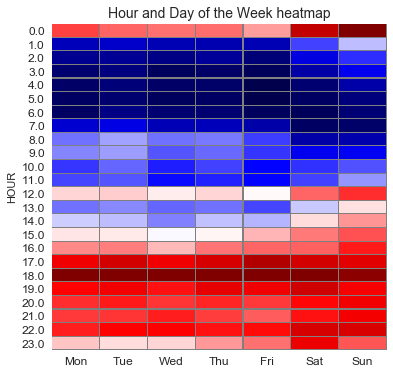

In [66]:
#Create a pivot table with hour and day of week. 
crimes_pivot_table = crimes1[crimes1['HOUR'] != 99].pivot_table(values='TYPE', index='DayOfWeekID', columns='HOUR', aggfunc=len)

# To compare categories, I'm scaling each category by diving by the max value of each one
crimes_scaled = pd.DataFrame(crimes_pivot_table.loc[0] / crimes_pivot_table.loc[0].max())

# Using a for loop to scale each day
for i in [1,2,3,4,5,6]:
    crimes_scaled[i] = crimes_pivot_table.loc[i] / crimes_pivot_table.loc[i].max()

# Rename days of week
crimes_scaled.columns = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

# Using seaborn heatmap
plt.figure(figsize=(6,6))
plt.title('Hour and Day of the Week heatmap', fontsize=14)
plt.tick_params(labelsize=12)
sns.heatmap(crimes_scaled, cmap='seismic', linecolor='grey',linewidths=0.1, cbar=False)
plt.savefig('C:\\Users\\irockONi7\\crime-in-vancouver/22EachHour.jpg')

Findings
1. on Weekends: the crimes activity starts at 15:00-00 peaks at 17:00-23:00
2. on weekdays: the crimes activity starts at 16-00:00 peaks at 17:00-22:00

In [67]:
# Let's check what types of theft we have and how many
crimes1[crimes1['CATEGORY'] == 'Theft']['TYPE'].value_counts()

Theft from Vehicle    166738
Other Theft            49301
Theft of Vehicle       37663
Theft of Bicycle       24744
Name: TYPE, dtype: int64

Text(0, 0.5, 'Frequency')

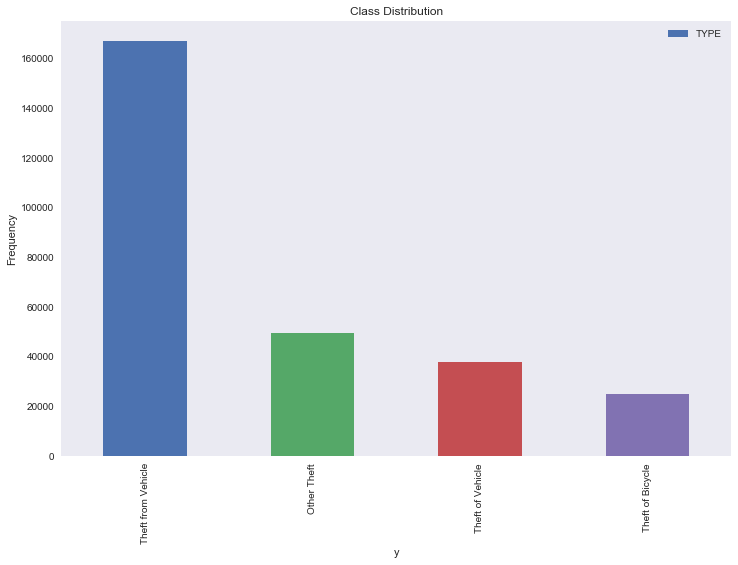

In [68]:
# bar graph of above calculations
rcParams['figure.figsize'] = 12,8
count_classes = pd.value_counts(crimes1[crimes1['CATEGORY'] == 'Theft']['TYPE'],sort=True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Class Distribution")
plt.grid()
plt.xticks(rotation=90)
plt.xlabel('y')
plt.legend()
plt.ylabel('Frequency')

Findings: 
    Theft from Vehicle is the major type

## Each type of crimes general trend

<Figure size 864x576 with 0 Axes>

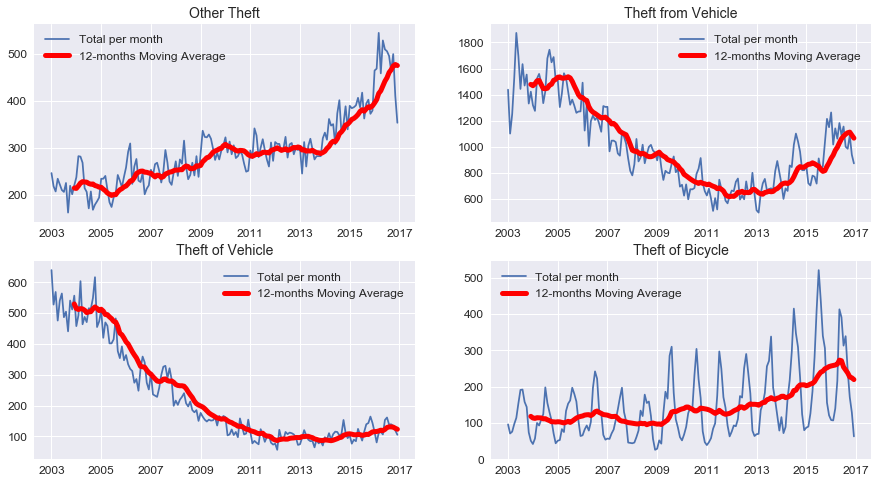

In [69]:
# Initiate the figure and define size
plt.figure(1)
plt.figure(figsize=(15,8))

# Using a for loop to plot each type of crime with a moving average
i = 221
for crime_type in crimes1[crimes1['CATEGORY'] == 'Theft']['TYPE'].unique():    
    plt.subplot(i);
    crimes[crimes['TYPE'] == crime_type].resample('M').size().plot(label='Total per month')
    crimes[crimes['TYPE'] == crime_type].resample('M').size().rolling(window=12).mean().plot(color='red', linewidth=5, label='12-months Moving Average')
    plt.title(crime_type, fontsize=14)
    plt.xlabel('')
    plt.legend(prop={'size':12})
    plt.tick_params(labelsize=12)
    i = i + 1
    plt.savefig('C:\\Users\\irockONi7\\crime-in-vancouver/23GeneralTrend.jpg')

Oher Theft  
1. This trend has been increasing. from around 200 to almost 500 crimes per month.  
  
Theft from Vehicle  
1. it is the most frequent type of crime.
2. This trend has been decreasing till 2012 from 1600 to 600 and then it has increased to 1200 in 2017.  
  
Theft of Vehicle  
1. this crime has decreased from 600ish to almost 100  
  
Theft of Bicycle  
1. we can see the trend from graph that this crimes peak during the mid of year: summer.  
2. The average has also been increasing.  


In [70]:
import gmplot 
# Clean the data of zero points of latitude amd longitude as we can not plot those coordinates
dfCoord = dfcrime[(dfcrime.Latitude != 0.0) & (dfcrime.Longitude != 0.0)]

# Assign datapoints in variables
latitude = dfCoord["Latitude"]
longitude = dfCoord["Longitude"]

# Creating the location we would like to initialize the focus on. 
# Parameters: Lattitude, Longitude, Zoom
gmap = gmplot.GoogleMapPlotter(49.262, -123.135, 11)

# Overlay our datapoints onto the map
gmap.heatmap(latitude, longitude)

# Generate the heatmap into an HTML file
gmap.draw("crime_heatmap1.html")

### General Trend

To view the General trend of each crimes from 2003-2017 and to analyze if the crimes are increasing or decreasing.

For example, the drop of vehicle theft has decreased and bicycle theft has increased. 

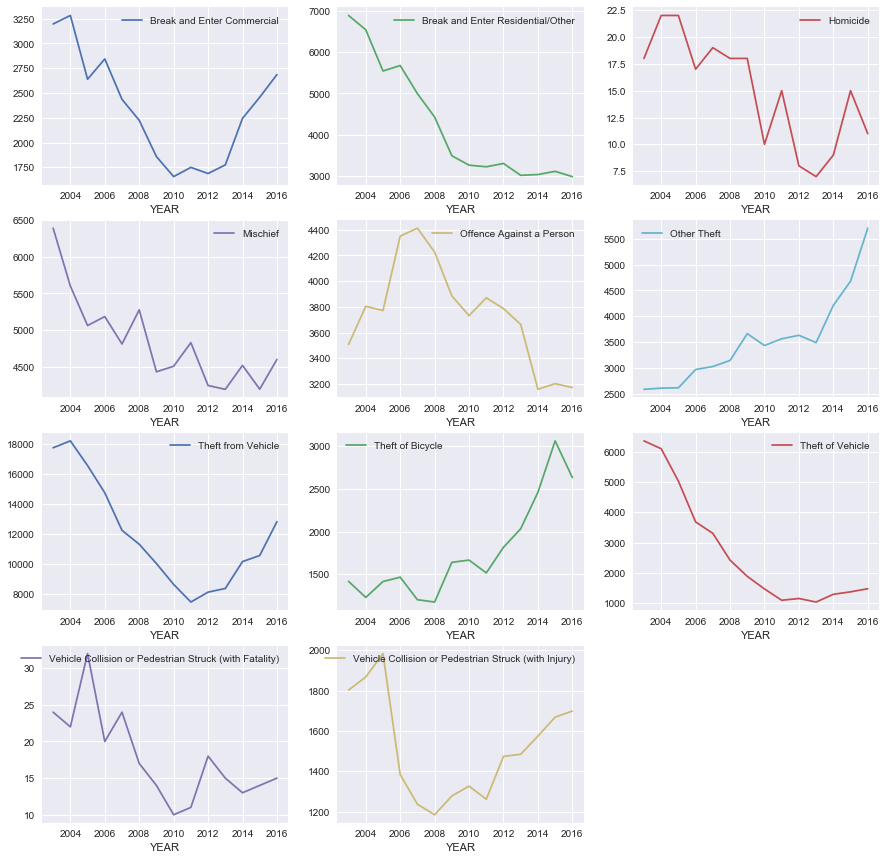

In [71]:
%matplotlib inline

# Crime count by Category per year
dfPivCrimeDate = dfcrime.pivot_table(values='Incident'
                                     ,aggfunc=np.size
                                     ,columns='TYPE'
                                     ,index='YEAR'
                                     ,fill_value=0)
plo = dfPivCrimeDate.plot(figsize=(15, 15), subplots=True, layout=(-1, 3), sharex=False, sharey=False)
plt.savefig('dfPivCrimeDate.jpg')

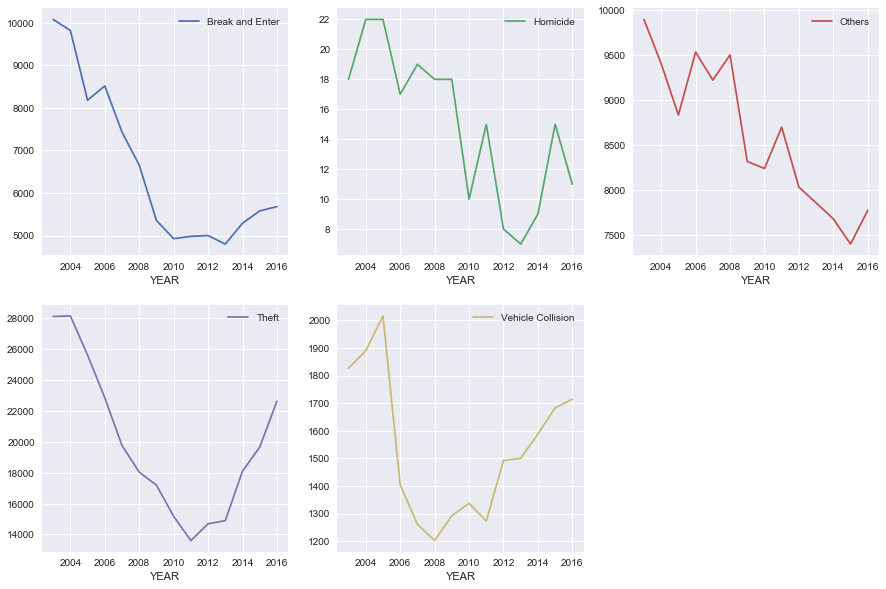

In [72]:
%matplotlib inline
# Crime count by Category per year
dfPivCrimeDate11 = dfcrime.pivot_table(values='Incident'
                                     ,aggfunc=np.size
                                     ,columns='CATEGORY'
                                     ,index='YEAR'
                                     ,fill_value=0)
plo1 = dfPivCrimeDate11.plot(figsize=(15, 10), subplots=True, layout=(-1, 3), sharex=False, sharey=False)
plt.savefig('dfPivCrimeDate1.jpg')

## Decision Tree

In [73]:
# New DataFrame to filter out columns needed
dfRandomF = dfcrime

# Split data for training and testing
#dfRandomF['train'] = np.random.uniform(0, 1, len(dfRandomF)) <= .70

X = dfRandomF[['YEAR', 'MONTH', 'DAY','HOUR', 'NeighbourhoodID']]

Y = dfRandomF[['TYPE']]

#Y1 becomes CATORICAL
X1 = X

Y1 = dfRandomF[['CATEGORY']]

# To create a training and testing set, I am splitting the data
# by 70% training and 30% testing
X_train , X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 5)
X_train1 , X_test1, y_train1, y_test1 = train_test_split( X1, Y1, test_size = 0.3, random_state = 5)
print('original data data:                                     ', X.shape, Y.shape)
print('Number of observations and columns in the training data:', X_train.shape, y_train.shape)
print('Number of observations and columns in the testing data:',X_test.shape, y_test.shape)
print('original data data:                                     ', X1.shape, Y1.shape)
print('Number of observations and columns in the training data:', X_train1.shape, y_train1.shape)
print('Number of observations and columns in the testing data:',X_test1.shape, y_test1.shape)

original data data:                                      (512795, 5) (512795, 1)
Number of observations and columns in the training data: (358956, 5) (358956, 1)
Number of observations and columns in the testing data: (153839, 5) (153839, 1)
original data data:                                      (512795, 5) (512795, 1)
Number of observations and columns in the training data: (358956, 5) (358956, 1)
Number of observations and columns in the testing data: (153839, 5) (153839, 1)


Decision Tree Classifier with criterion gini index

In [74]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 5,
                               max_depth=5, min_samples_leaf=8)

clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=5,
            splitter='best')

In [75]:
clf_gini1 = DecisionTreeClassifier(criterion = "gini", random_state = 5,
                               max_depth=5, min_samples_leaf=8)
clf_gini1.fit(X_train1, y_train1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=5,
            splitter='best')

In [76]:
# Adding prediction test
y_pred_gn = clf_gini.predict(X_test)

In [77]:
# Adding prediction test
y_pred_gn1 = clf_gini1.predict(X_test1)

Decision Tree Classifier with criterion entropy

In [78]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 5,
                                    max_depth=5, min_samples_leaf=8)
clf_entropy.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=5,
            splitter='best')

In [79]:
clf_entropy1 = DecisionTreeClassifier(criterion = "entropy", random_state = 5,
                                    max_depth=5, min_samples_leaf=8)
clf_entropy1.fit(X_train1, y_train1)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=5,
            splitter='best')

In [80]:
# Adding prediction test
y_pred_en = clf_entropy.predict(X_test)

In [81]:
# Adding prediction test
y_pred_en1 = clf_entropy1.predict(X_test1)

In [82]:
# Random values for prediction 
clf_gini.predict([[2017,1,5,15.0,12]])

array(['Theft from Vehicle'], dtype=object)

In [83]:
# Using the same parameters for predition
dfpred[(dfpred['YEAR'] == 2017) & 
        (dfpred['MONTH'] == 1) & 
        (dfpred['DAY'] == 5) & 
        (dfpred['HOUR'] == 15.0) &
        (dfpred['NeighbourhoodID'] == 12)]

,TYPE,YEAR,MONTH,DAY,HOUR,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,NeighbourhoodID,CrimeTypeID,Incident,Date,DayOfWeek,DayOfWeekID


Using the same parameters and excluding the Hour now.

In [84]:
dfpred[(dfpred['YEAR'] == 2017) & 
        (dfpred['MONTH'] == 1) & 
        (dfpred['DAY'] == 5) & 
        (dfpred['NeighbourhoodID'] == 12)]

,TYPE,YEAR,MONTH,DAY,HOUR,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,NeighbourhoodID,CrimeTypeID,Incident,Date,DayOfWeek,DayOfWeekID
514801,Break and Enter Residential/Other,2017,1,5,9.0,4XX E 6TH AVE,Mount Pleasant,493142.36,5456944.35,49.265223,-123.094259,12,2,1,2017-01-05,Thursday,3
514947,Theft from Vehicle,2017,1,5,21.0,1XX W 1ST AVE,Mount Pleasant,492084.79,5457519.47,49.270384,-123.108807,12,7,1,2017-01-05,Thursday,3
526353,Break and Enter Commercial,2017,1,5,5.0,2X W 7TH AVE,Mount Pleasant,492335.09,5456880.64,49.264641,-123.105353,12,1,1,2017-01-05,Thursday,3
527070,Theft from Vehicle,2017,1,5,22.0,2XX E 6TH AVE,Mount Pleasant,492791.96,5456976.73,49.265511,-123.099076,12,7,1,2017-01-05,Thursday,3
530182,Other Theft,2017,1,5,14.0,23XX CAMBIE ST,Mount Pleasant,491656.42,5456901.55,49.264820,-123.114682,12,6,1,2017-01-05,Thursday,3


In [85]:
print ('Accuracy for GINI criterion : TYPE: ', accuracy_score(y_test,y_pred_gn)*100, '%')

Accuracy is: TYPE:  43.04175144144203 %


In [86]:
print ('Accuracy for GINI criterion: CATEGORY: ', accuracy_score(y_test1,y_pred_gn1)*100, '%')

Accuracy is: CATEGORY:  65.06477551206132 %


In [87]:
print ('Accuracy for Entropy criterion: TYPE: ', accuracy_score(y_test,y_pred_en)*100, '%')

Accuracy is: TYPE:  42.97479832812226 %


In [88]:
print ('Accuracy for Entropy criterion: CATEGORY: ', accuracy_score(y_test1,y_pred_en1)*100, '%')

Accuracy is: CATEGORY:  65.14732935081481 %


In [98]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test,y_pred_gn)
print(classification_report(y_test,y_pred_gn))
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
print('Average=Weighted: ', f1_score(y_test, y_pred_gn, average='weighted'))
print('Average=Micro: ',f1_score(y_test, y_pred_gn, average='micro'))
print('Average=None: ',f1_score(y_test, y_pred_gn, average=None))
#precision,recall,thresholds=precision_recall_curve(y_test,y_pred_gn)

C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



                                                        precision    recall  f1-score   support

                            Break and Enter Commercial       0.27      0.25      0.26      9896
                     Break and Enter Residential/Other       0.00      0.00      0.00     17860
                                              Homicide       0.00      0.00      0.00        67
                                              Mischief       0.33      0.04      0.07     20287
                              Offence Against a Person       1.00      1.00      1.00     15531
                                           Other Theft       0.00      0.00      0.00     14805
                                    Theft from Vehicle       0.37      0.94      0.54     50257
                                      Theft of Bicycle       0.00      0.00      0.00      7344
                                      Theft of Vehicle       0.00      0.00      0.00     11398
Vehicle Collision or Pedestrian Struck 

C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [106]:
def my_F1_score(y_test,y_pred_gn):
    from sklearn.metrics import classification_report, confusion_matrix
    confusion_matrix(y_test,y_pred_gn)
    print(classification_report(y_test,y_pred_gn))
    from sklearn.metrics import f1_score
    print('Average=Weighted: ', f1_score(y_test, y_pred_gn, average='weighted'))
    print('Average=Micro: ',f1_score(y_test, y_pred_gn, average='micro'))
    print('Average=None: ',f1_score(y_test, y_pred_gn, average=None))

In [107]:
my_F1_score(y_test,y_pred_gn)

C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



                                                        precision    recall  f1-score   support

                            Break and Enter Commercial       0.27      0.25      0.26      9896
                     Break and Enter Residential/Other       0.00      0.00      0.00     17860
                                              Homicide       0.00      0.00      0.00        67
                                              Mischief       0.33      0.04      0.07     20287
                              Offence Against a Person       1.00      1.00      1.00     15531
                                           Other Theft       0.00      0.00      0.00     14805
                                    Theft from Vehicle       0.37      0.94      0.54     50257
                                      Theft of Bicycle       0.00      0.00      0.00      7344
                                      Theft of Vehicle       0.00      0.00      0.00     11398
Vehicle Collision or Pedestrian Struck 

C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



Average=Weighted:  0.3017033534061793
Average=Micro:  0.4304175144144203
Average=None:  [0.26025087 0.         0.         0.0695338  0.99784767 0.
 0.53584765 0.         0.         0.         0.        ]


C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



In [108]:
my_F1_score(y_test1,y_pred_gn1)

C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



                   precision    recall  f1-score   support

  Break and Enter       0.42      0.14      0.21     27756
         Homicide       0.00      0.00      0.00        67
           Others       1.00      0.43      0.60     35818
            Theft       0.63      0.96      0.76     83804
Vehicle Collision       0.00      0.00      0.00      6394

        micro avg       0.65      0.65      0.65    153839
        macro avg       0.41      0.31      0.31    153839
     weighted avg       0.65      0.65      0.59    153839



C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



Average=Weighted:  0.5915270234605036
Average=Micro:  0.6506477551206131
Average=None:  [0.20976296 0.         0.60413101 0.75818553 0.        ]


C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



In [109]:
my_F1_score(y_test,y_pred_en)

C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



                                                        precision    recall  f1-score   support

                            Break and Enter Commercial       0.25      0.18      0.21      9896
                     Break and Enter Residential/Other       0.36      0.01      0.03     17860
                                              Homicide       0.00      0.00      0.00        67
                                              Mischief       0.29      0.06      0.09     20287
                              Offence Against a Person       1.00      1.00      1.00     15531
                                           Other Theft       0.00      0.00      0.00     14805
                                    Theft from Vehicle       0.37      0.94      0.54     50257
                                      Theft of Bicycle       0.00      0.00      0.00      7344
                                      Theft of Vehicle       0.00      0.00      0.00     11398
Vehicle Collision or Pedestrian Struck 

C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



Average=Weighted:  0.30477097130448727
Average=Micro:  0.4297479832812226
Average=None:  [0.20932557 0.02570333 0.         0.09345408 0.99784767 0.
 0.5364753  0.         0.         0.         0.        ]


C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



In [110]:
my_F1_score(y_test1,y_pred_en1)

C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



                   precision    recall  f1-score   support

  Break and Enter       0.44      0.11      0.18     27756
         Homicide       0.00      0.00      0.00        67
           Others       1.00      0.43      0.60     35818
            Theft       0.62      0.97      0.76     83804
Vehicle Collision       0.00      0.00      0.00      6394

        micro avg       0.65      0.65      0.65    153839
        macro avg       0.41      0.30      0.31    153839
     weighted avg       0.65      0.65      0.59    153839



C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



Average=Weighted:  0.5857431214357901
Average=Micro:  0.6514732935081481
Average=None:  [0.17519344 0.         0.60413101 0.7590175  0.        ]


C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



In [89]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:

## prepare configuration for cross validation test harness
#seed = 7
# prepare models
#models = []
#models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
#models.append(('GB', GradientBoostingClassifier()))

# evaluate each model in turn
#results = []
#names = []
#scoring = 'accuracy'
#for name, model in models:
    #kfold = model_selection.KFold(n_splits=10, random_state=seed)
#    kfold = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
    #kfold.get_n_splits(XX, catagories)
    #print(sss)
#    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
#    results.append(cv_results)
#    names.append(name)
#    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#    print(msg)

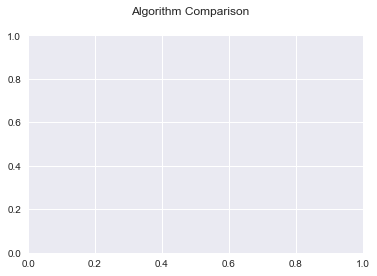

In [91]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
#plt.boxplot(results)
#ax.set_xticklabels(names)
plt.show()

In [92]:
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
Random_Forest_Model = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
get_score(Random_Forest_Model,X_train,X_test,y_train,y_test)
Random_Forest_predictions = Random_Forest_Model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, Random_Forest_predictions))
print()
print("Classification Report")
print(classification_report(y_test, Random_Forest_predictions))

C:\Users\iRockONi7\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Confusion Matrix:
[[    0     0     0     0     0     0  9896     0     0     0     0]
 [    0     0     0     0     0     0 17860     0     0     0     0]
 [    0     0     0     0    67     0     0     0     0     0     0]
 [    0     0     0     0     0     0 20287     0     0     0     0]
 [    0     0     0     0 15531     0     0     0     0     0     0]
 [    0     0     0     0     0     0 14805     0     0     0     0]
 [    0     0     0     0     0     0 50257     0     0     0     0]
 [    0     0     0     0     0     0  7344     0     0     0     0]
 [    0     0     0     0     0     0 11398     0     0     0     0]
 [    0     0     0     0     0     0    72     0     0     0     0]
 [    0     0     0     0     0     0  6322     0     0     0     0]]

Classification Report


C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



                                                        precision    recall  f1-score   support

                            Break and Enter Commercial       0.00      0.00      0.00      9896
                     Break and Enter Residential/Other       0.00      0.00      0.00     17860
                                              Homicide       0.00      0.00      0.00        67
                                              Mischief       0.00      0.00      0.00     20287
                              Offence Against a Person       1.00      1.00      1.00     15531
                                           Other Theft       0.00      0.00      0.00     14805
                                    Theft from Vehicle       0.36      1.00      0.53     50257
                                      Theft of Bicycle       0.00      0.00      0.00      7344
                                      Theft of Vehicle       0.00      0.00      0.00     11398
Vehicle Collision or Pedestrian Struck 

C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [94]:
from sklearn.linear_model import LogisticRegression
Logistic_Regression_Model = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
get_score(Logistic_Regression_Model,X_train,X_test,y_train,y_test)
Logistic_Regression_predictions = Logistic_Regression_Model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, Logistic_Regression_predictions))
print()
print("Classification Report")
print(classification_report(y_test, Logistic_Regression_predictions))

C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.



Confusion Matrix:
[[    0     0     0     0     0     0  9896     0     0     0     0]
 [    0     0     0     0     0     0 17860     0     0     0     0]
 [    0     0     0     0    67     0     0     0     0     0     0]
 [    0     0     0     0     0     0 20287     0     0     0     0]
 [    0     0     0     0 15531     0     0     0     0     0     0]
 [    0     0     0     0     0     0 14805     0     0     0     0]
 [    0     0     0     0     0     0 50257     0     0     0     0]
 [    0     0     0     0     0     0  7344     0     0     0     0]
 [    0     0     0     0     0     0 11398     0     0     0     0]
 [    0     0     0     0     0     0    72     0     0     0     0]
 [    0     0     0     0     0     0  6322     0     0     0     0]]

Classification Report


C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



                                                        precision    recall  f1-score   support

                            Break and Enter Commercial       0.00      0.00      0.00      9896
                     Break and Enter Residential/Other       0.00      0.00      0.00     17860
                                              Homicide       0.00      0.00      0.00        67
                                              Mischief       0.00      0.00      0.00     20287
                              Offence Against a Person       1.00      1.00      1.00     15531
                                           Other Theft       0.00      0.00      0.00     14805
                                    Theft from Vehicle       0.36      1.00      0.53     50257
                                      Theft of Bicycle       0.00      0.00      0.00      7344
                                      Theft of Vehicle       0.00      0.00      0.00     11398
Vehicle Collision or Pedestrian Struck 

C:\Users\iRockONi7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [95]:
#from sklearn import svm
#SVM_Model = svm.SVC(kernel='linear', C=1)
#get_score(SVM_Model,X_train,X_test, y_train, y_test)
#SVM_predictions = SVM_Model.predict(X_test)

#print("Confusion Matrix:")
#print(confusion_matrix(y_test, SVM_predictions))
#print()
#print("Classification Report")
#print(classification_report(y_test, SVM_predictions))